<a href="https://colab.research.google.com/github/2016130786/class-2021-spring-/blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy basics

## 1. Creation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

numpy를 np로 칭하겠다.

이제 numpy는 np가 된다. 

matplotlib.pyplot를 plt라고 칭하겠다. 

In [ ]:
np.empty([2,3], dtype='int')

array([[94302613241344,              0,              0],
       [             0,              0,              0]])

empty[2,3]는 2x3의 행렬을 만든다. 

In [ ]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

zeros도 행렬임. 0으로 가득찬 행렬

In [ ]:
np.arange(0,10,2, dtype='float64')

array([0., 2., 4., 6., 8.])

0에서 10직전까지 2만큼을 때서 숫자를 정렬하라. 

In [ ]:
np.linspace(0,10,6, dtype=float)

array([ 0.,  2.,  4.,  6.,  8., 10.])

linspace는 0에서 10까지 총 6개 숫자로 만들어라. 

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
X.astype(np.float64)

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
np.zeros_like(X)

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
np.random.normal(0,1,100)

정규분포 정중앙이 0이고 간격은 1로해서 임의로 100개 숫자를 만들어라. 

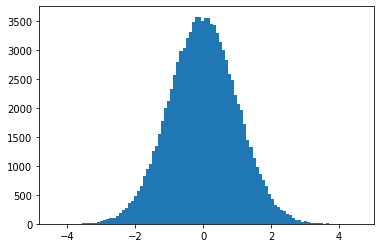

In [ ]:
data = np.random.normal(0,1, 100000)
#print(data)
plt.hist(data, bins=100)
plt.show()

hist는 그림을 그리는 것.  bin은 막대기의 갯수를 의미한다. 

즉 정중앙이 0이고 간격이 1인 정규분포를 막대기 100개를 이용해서 그림. 

## 2. Manipulation

In [ ]:
X = np.ones([2, 3, 4])
X

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

2x3x4 = 24 의 행렬임. 크게 2개. 3행으로 4열임.





In [ ]:
Y = X.reshape(-1, 3, 2)
Y

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

-1은 인간이 직접 나누기 귀차느니까 -1을 쓰면 컴퓨터가 알아서 곱해서 24가 되게끔 만들어 준다.

In [ ]:
np.allclose(X.reshape(-1, 3, 2), Y)

True

In [ ]:
assert np.allclose(X.reshape(-1, 3, 2), Y)

## 3. NumPy I/O

In [ ]:
a = np.random.randint(0, 10, [2, 3])
b = np.random.random([2, 3])
np.savez("test", a, b)

In [ ]:
!ls -al test*

-rw-r--r--  1 jookai  staff     562 Apr  2 00:35 test.npz
-rw-r--r--  1 jookai  staff  123438 Mar 14 23:19 test.wav


In [ ]:
del a, b
%who  # Print all interactive variables

No variables match your requested type.


In [ ]:
npzfiles = np.load("test.npz")
npzfiles.files

['arr_0', 'arr_1']

In [ ]:
npzfiles['arr_0']

array([[1, 5, 2],
       [1, 7, 0]])

In [ ]:
from google.colab import files
uploaded = files.upload()
data = np.loadtxt("regression.csv", delimiter=",", skiprows=1, dtype={'names':("X", "Y"), 'formats':('f', 'f')})
data

Saving regression.csv to regression.csv


In [ ]:
np.savetxt("regression_saved.csv", data, delimiter=",")
!ls -al regression_saved.csv

-rw-r--r-- 1 root root 850 Mar 21 16:33 regression_saved.csv


## 4. Inspecting

In [ ]:
arr = np.random.random(100)
arr

In [ ]:
arr = np.random.random([5,2,3])
arr

array([[[0.11224288, 0.63571895, 0.40828427],
        [0.51983772, 0.55589737, 0.07527564]],

       [[0.87275868, 0.54595909, 0.19262877],
        [0.98472158, 0.78204885, 0.26346807]],

       [[0.72430072, 0.85922468, 0.93980525],
        [0.48671735, 0.44916461, 0.98110572]],

       [[0.29113344, 0.81391976, 0.51853051],
        [0.52878087, 0.45133633, 0.96515978]],

       [[0.51554298, 0.3237098 , 0.00579451],
        [0.48338563, 0.15370048, 0.67802126]]])

In [ ]:
print(type(arr))
print(len(arr))
print(arr.shape)
print(arr.ndim)
print(arr.size)
print(arr.dtype)

<class 'numpy.ndarray'>
5
(5, 2, 3)
3
30
float64


## 5. Operations

### 5.1 Arithmetic

In [ ]:
a = np.arange(1, 5)
b = np.arange(9, 5, -1)

In [ ]:
print(a - b)
print(a * b)


[-8 -6 -4 -2]
[ 9 16 21 24]


In [ ]:
a = np.matrix(a)
b = np.matrix(b)

In [ ]:
a * b.T

matrix([[70]])

In [ ]:
a.T * b

matrix([[ 9,  8,  7,  6],
        [18, 16, 14, 12],
        [27, 24, 21, 18],
        [36, 32, 28, 24]])

### 5.2 Comparison

In [ ]:
a = np.arange(1, 10).reshape(3,3)
b = np.arange(9, 0, -1).reshape(3,3)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [ ]:
a == b

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

In [ ]:
a > b

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

### 5.3 Aggregate (sum, min, max, mean, median, std)

In [ ]:
a.sum(), np.sum(a)

(45, 45)

In [ ]:
a.sum(axis=0), np.sum(a, axis=0)

(array([12, 15, 18]), array([12, 15, 18]))

In [ ]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 6, 15, 24]), array([ 6, 15, 24]))

## Broadcasting

In [ ]:
a = np.arange(1, 25).reshape(4, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [ ]:
a + 100

array([[101, 102, 103, 104, 105, 106],
       [107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118],
       [119, 120, 121, 122, 123, 124]])

In [ ]:
b = np.arange(6)
b

array([0, 1, 2, 3, 4, 5])

In [ ]:
a + b

array([[ 1,  3,  5,  7,  9, 11],
       [ 7,  9, 11, 13, 15, 17],
       [13, 15, 17, 19, 21, 23],
       [19, 21, 23, 25, 27, 29]])

In [ ]:
c = np.arange(4).reshape([4,1])
c

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
a + c

array([[ 1,  2,  3,  4,  5,  6],
       [ 8,  9, 10, 11, 12, 13],
       [15, 16, 17, 18, 19, 20],
       [22, 23, 24, 25, 26, 27]])